In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy.orm import sessionmaker
import pandas

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime
from dateutil.relativedelta import relativedelta 
from sqlalchemy import desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine , reflect = True)



In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example'
print(calc_temps("2016-08-23" , "2017-08-23"))


[(58.0, 74.59058295964125, 87.0)]


In [10]:
# # Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# # for a year in the data set
# #[(56.0, 72.3481421647819, 86.0)]
# start_date =dt.date(2012,1,1)
# end_date =dt.date(2012,12,31)
# tmin,tavg,tmax = calc_temps(start_date.strftime("%Y-%m-%d"),end_date.strftime("%Y-%m-%d"))[0]

# print(tmin,tavg,tmax) 
temps = calc_temps("2016-08-23", "2017-08-23")
temps

[(58.0, 74.59058295964125, 87.0)]

In [11]:
df = pd.DataFrame(temps, columns=["TMIN", "TAVG", "TMAX"])
df


,TMIN,TAVG,TMAX
0,58.0,74.590583,87.0


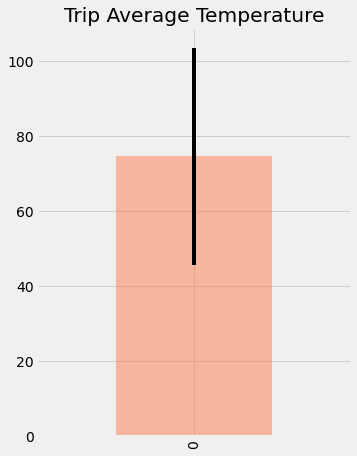

In [12]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

df.plot.bar(y="TAVG", yerr=(df["TMAX"] - df["TMIN"]), 
                    title="Trip Average Temperature", color="coral", 
                    alpha=0.5, figsize=(5,7), legend=None)

### Daily Rainfall Average

In [13]:
# Find the most recent date in the data set.
  
recent_date = session.query(func.max(Measurement.date)).scalar()


recent_date_minus_year = (datetime.strptime(recent_date, '%Y-%m-%d') - relativedelta(years=1)).strftime('%Y-%m-%d')
print(recent_date_minus_year)
print(recent_date)

2016-08-23
2017-08-23


In [14]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount
# list the station, name, latitude, longitude, and elevation
#SQLAlCHEMY ORM QUERY TO FETCH ALL RECORDS
df_prcp = pandas.read_sql_query(
     #sql = session.query(Measurement).statement,
     sql = session.query( Measurement.station,func.sum(Measurement.prcp), Station.name, Station.latitude, Station.longitude, Station.elevation).join(Station,Measurement.station==Station.station).filter(Measurement.date.between(recent_date_minus_year,recent_date)).group_by(Measurement.station ).order_by(desc((func.sum(Measurement.prcp)))).statement,
     con = engine
 )

df_prcp




,station,sum_1,name,latitude,longitude,elevation
0,USC00516128,147.81,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,70.03,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,48.51,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00519523,38.01,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,USC00514830,33.24,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,USC00519397,16.09,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00517948,4.59,"PEARL CITY, HI US",21.39340,-157.97510,11.9


### Daily Temperature Normals

In [15]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [16]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [17]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [18]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session